In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import scipy as sp
from sklearn.linear_model import LinearRegression

pd.set_option("display.max_columns", 100)

import statsmodels.api as sm
import statsmodels.stats.api as sms

from scipy import stats


In [2]:
df = pd.read_csv('../Data/Ames_HousePrice.csv')

In [3]:
df[['SaleCondition']].value_counts()

SaleCondition
Normal           2414
Partial            82
Abnorml            61
Family             17
Alloca              4
AdjLand             2
dtype: int64

In [4]:
df.loc[df['SaleCondition'] == 'Normal', 'Top'] = 1
df.loc[df['SaleCondition'] == 'Partial', 'Top'] = 2
df.loc[df['SaleCondition'] == 'Abnorml', 'Top'] = 3
df.loc[df['SaleCondition'] == 'Family', 'Top'] = 4
df.loc[df['SaleCondition'] == 'Alloca', 'Top'] = 5
df.loc[df['SaleCondition'] == 'AdjLand', 'Top'] = 6
df = df.sort_values(by=['Top'], ascending=True) 

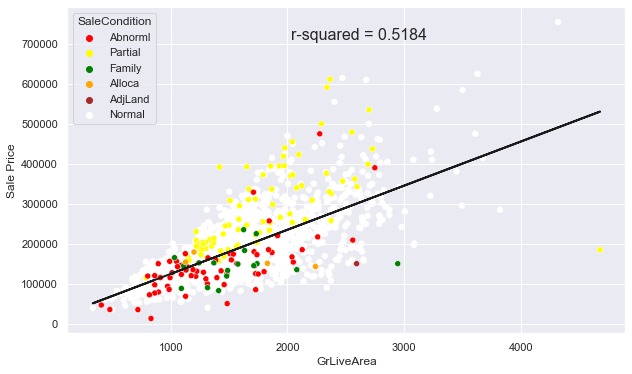

In [5]:
regressor = LinearRegression()

y = df['SalePrice'].values.reshape(-1,1)
x = df['GrLivArea'].values.reshape(-1,1)
regressor.fit(x,y)
    
sns.set()
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

#plt.scatter(x,y, c='green', alpha=0.3)

color_dict = dict({'Abnorml':'red',
                  'Partial':'yellow',
                  'Family':'green',
                  'Alloca':'orange',
                  'AdjLand':'brown',
                  'Normal':'white'})

plt.xlabel('GrLiveArea')
plt.ylabel('Sale Price')
plt.plot(x, regressor.predict(x), lw=2, c='k')
plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
#plt.show();

sns.scatterplot(x='GrLivArea', y='SalePrice', hue='SaleCondition', 
                hue_order=['Abnorml','Partial','Family','Alloca','AdjLand','Normal'],
                palette = color_dict,
                data=df);

In [6]:
Normal = df[df['SaleCondition'] == 'Normal']
Normal.shape

(2414, 83)

In [7]:
numeric = Normal.select_dtypes('number')
numeric.shape

(2414, 40)

In [8]:
Area = numeric[['LotArea','GrLivArea','1stFlrSF', '2ndFlrSF', 'LowQualFinSF', '3SsnPorch', 'BsmtFinSF1', 
                'BsmtFinSF2', 'WoodDeckSF','BsmtUnfSF', 'EnclosedPorch', 'GarageArea',
               'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'PoolArea',
               'ScreenPorch', 'TotalBsmtSF']]
Area.shape

(2414, 18)

In [9]:
#Impute with 896 for the one missing TotalBsmtSF which is size of 1stFlrSF:
Area['TotalBsmtSF'] = Area['TotalBsmtSF'].replace(np.nan, 896)

/var/folders/kl/4xt5tydd0xb8yvwkgnx2mnc00000gn/T/ipykernel_18793/1729680531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Area['TotalBsmtSF'] = Area['TotalBsmtSF'].replace(np.nan, 896)


In [10]:
Area['GarageArea'] = Area['GarageArea'].replace(np.nan, 0)

/var/folders/kl/4xt5tydd0xb8yvwkgnx2mnc00000gn/T/ipykernel_18793/2728991719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Area['GarageArea'] = Area['GarageArea'].replace(np.nan, 0)


In [11]:
Area['MasVnrArea'] = Area['MasVnrArea'].replace(np.nan, 0)

/var/folders/kl/4xt5tydd0xb8yvwkgnx2mnc00000gn/T/ipykernel_18793/289676058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Area['MasVnrArea'] = Area['MasVnrArea'].replace(np.nan, 0)


In [12]:
# Group lots by configuration
grouped_lots = df.groupby(['LotConfig']).agg({
   'LotFrontage' : 'mean', 
})

#grouped_lots

LC = df[['LotConfig']]
Area['LC'] = LC

#replace np.nan with average for lot_config of that type
Area.loc[(Area['LotFrontage'].isna()) & (Area['LC'] == 'Corner'), 'LotFrontage'] = 84.46
Area.loc[(Area['LotFrontage'].isna()) & (Area['LC'] == 'CulDSac'), 'LotFrontage'] = 56.45        
Area.loc[(Area['LotFrontage'].isna()) & (Area['LC'] == 'FR2'), 'LotFrontage'] = 59.41        
Area.loc[(Area['LotFrontage'].isna()) & (Area['LC'] == 'FR3'), 'LotFrontage'] = 79.3        
Area.loc[(Area['LotFrontage'].isna()) & (Area['LC'] == 'Inside'), 'LotFrontage'] = 66.63

/var/folders/kl/4xt5tydd0xb8yvwkgnx2mnc00000gn/T/ipykernel_18793/2369724597.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Area['LC'] = LC
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [13]:
GBGVWLO = Area[['GrLivArea', 'TotalBsmtSF', 'GarageArea','MasVnrArea', 'WoodDeckSF','LotFrontage','OpenPorchSF']]
GBGVWLO.shape

(2414, 7)

In [14]:
GBGVWLO = GBGVWLO.assign(GBGVWLO = GBGVWLO['GrLivArea'] + GBGVWLO['TotalBsmtSF'] + 
                     GBGVWLO['GarageArea'] + GBGVWLO['MasVnrArea'] + GBGVWLO['WoodDeckSF'] +
                      GBGVWLO['LotFrontage'] + GBGVWLO['OpenPorchSF'])
GBGVWLO.head(3)

,GrLivArea,TotalBsmtSF,GarageArea,MasVnrArea,WoodDeckSF,LotFrontage,OpenPorchSF,GBGVWLO
0,856,856.0,399.0,0.0,0,84.46,0,2195.46
1716,708,420.0,0.0,0.0,164,50.00,0,1342.00
1717,1430,384.0,400.0,0.0,0,62.00,0,2276.00


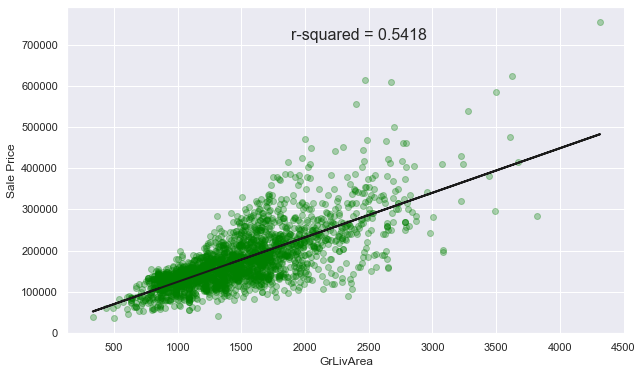

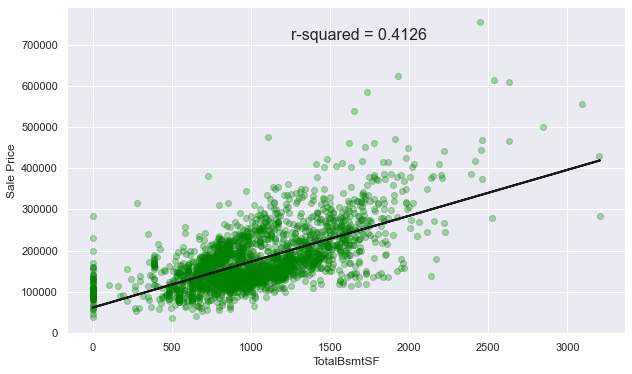

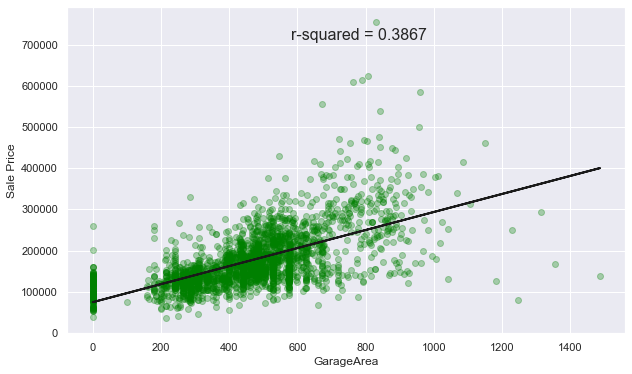

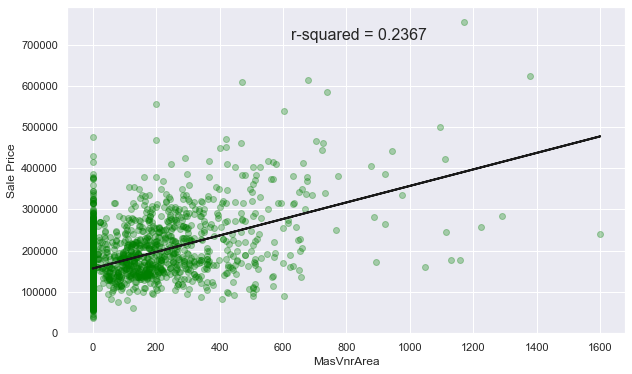

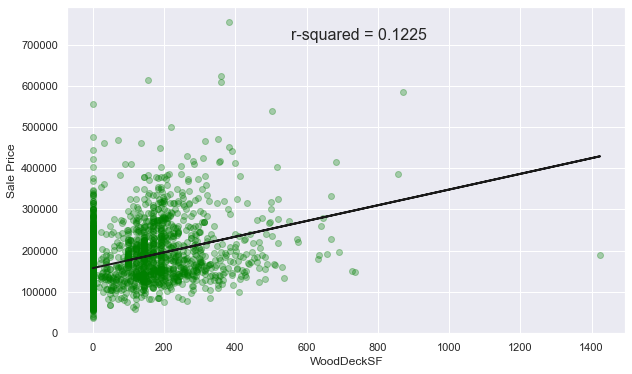

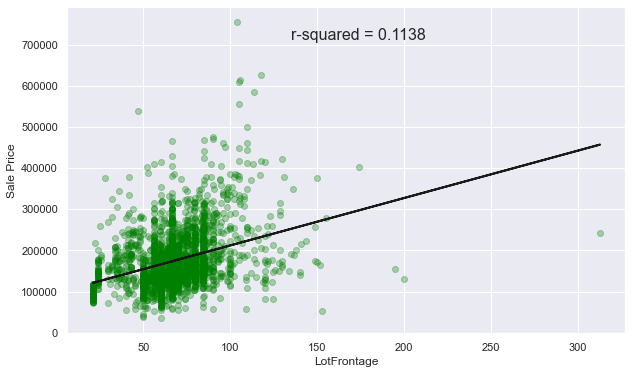

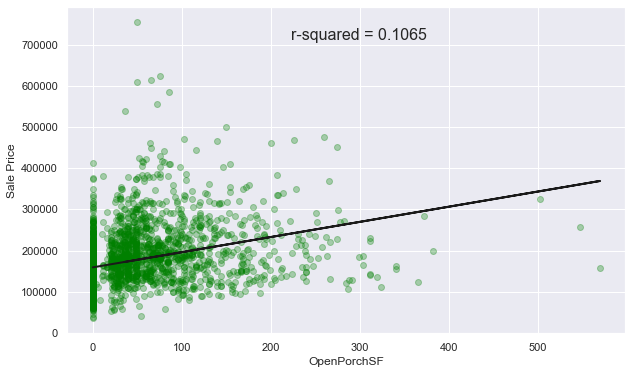

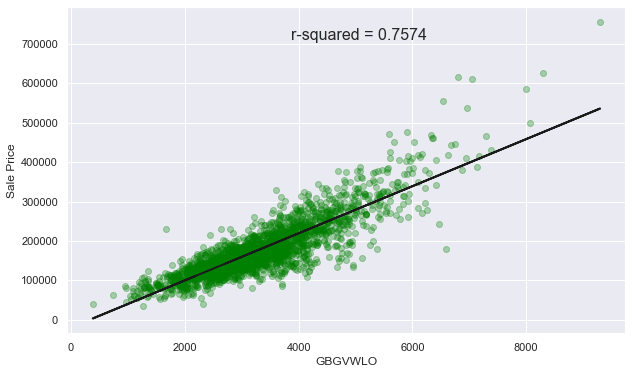

In [15]:
column_name = []
R2 = []

for column in GBGVWLO:

    regressor = LinearRegression()

    y = numeric['SalePrice'].values.reshape(-1,1)
    x = GBGVWLO[column].values.reshape(-1,1)
    regressor.fit(x,y)
    
    sns.set()
    sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

    plt.scatter(x,y, c='green', alpha=0.3)
    plt.xlabel(column)
    plt.ylabel('Sale Price')
    plt.plot(x, regressor.predict(x), lw=2, c='k')
    plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
    plt.show()
    
    column_name.append(column)
    R2.append(regressor.score(x,y))

In [16]:
SLR = pd.DataFrame(R2, column_name, columns=['R-Squared']).rename_axis('Feature').reset_index()
SLR.sort_values(by=['R-Squared'], ascending=False)

,Feature,R-Squared
7,GBGVWLO,0.757373
0,GrLivArea,0.541757
1,TotalBsmtSF,0.412551
2,GarageArea,0.386704
3,MasVnrArea,0.236704
4,WoodDeckSF,0.122503
5,LotFrontage,0.113823
6,OpenPorchSF,0.106520


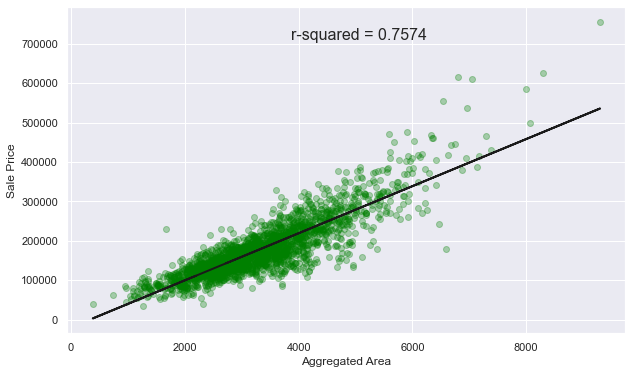

In [17]:
regressor = LinearRegression()

y = numeric['SalePrice'].values.reshape(-1,1)
x = GBGVWLO['GBGVWLO'].values.reshape(-1,1)
regressor.fit(x,y)
    
sns.set()
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

plt.scatter(x,y, c='green', alpha=0.3)
plt.xlabel('Aggregated Area')
plt.ylabel('Sale Price')
plt.plot(x, regressor.predict(x), lw=2, c='k')
plt.annotate("r-squared = {:.4f}".format(regressor.score(x,y)), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=16)
plt.show()

### Assumption Checks (No Transformation) ###

In [18]:
# Obtain and set x=input and y=output
x0 = GBGVWLO[["GBGVWLO"]]
y0 = numeric.SalePrice

In [19]:
#Setup statsmodels.api, inputs (x, x_constant, and y)
x_constant0 = sm.add_constant(x)

In [20]:
#Run OLS with statsmodels
lin_reg0 = sm.OLS(y,x_constant0).fit()
lin_reg0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     7529.
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:20:26   Log-Likelihood:                -28680.
No. Observations:                2414   AIC:                         5.736e+04
Df Residuals:                    2412   BIC:                         5.737e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.936e+04   2356.557     -8.215      0.000    -2.4e+04   -1.47e+04
x1            59.6897      0.688     86.771      0.000      58.341      61.039
==============================================================================
Omnibus:                      257.535   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1669.426
Skew:                           0.270   Prob(JB):                         0.00
Kurtosis:                       7.038   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

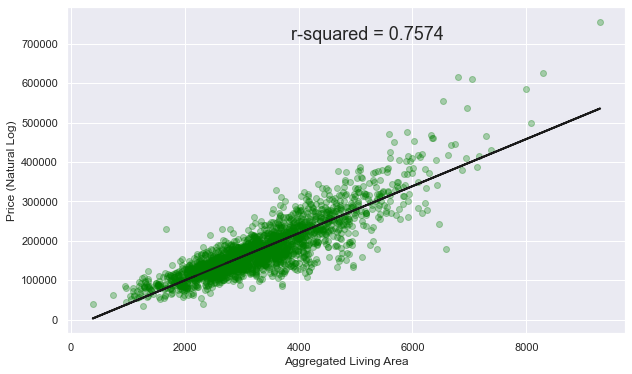

In [21]:
## Add fitted line to scatterplot
plt.plot(x0, lin_reg0.predict(), lw=2, c='k')

plt.scatter(x0, y0, c='green', alpha=0.3)
plt.xlabel('Aggregated Living Area')
plt.ylabel('Price (Natural Log)')
plt.annotate("r-squared = {:.4f}".format(lin_reg0.rsquared), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=18)
plt.show()

In [22]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

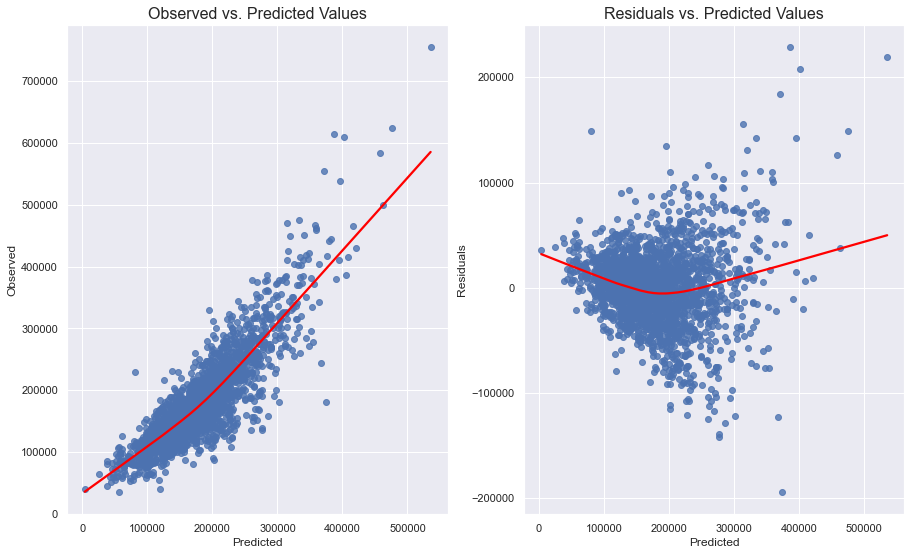

In [23]:
#Run Linearity Test for Assumption #1

import seaborn as sns 
import matplotlib.pyplot as plt

#import statsmodels.stats.api as sms

sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

linearity_test(lin_reg0, y)

In [24]:
#Check Assumption 2: Is expected (mean) value of residuals = 0? 
lin_reg0.resid.mean()

2.700603986043227e-12

In [25]:
#Check Assumption 3: Are errors independent? 
import statsmodels
statsmodels.stats.stattools.durbin_watson(lin_reg0.resid)

1.9303612089902962

In [26]:
#Check Assumption 4: Normality of Residuals
from scipy import stats
import statsmodels.api as sm

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    


Jarque-Bera test ---- statistic: 1669.4257, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9554, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.5058, p-value: 0.0000
Anderson-Darling test ---- statistic: 20.9139, 5% critical value: 0.7860
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


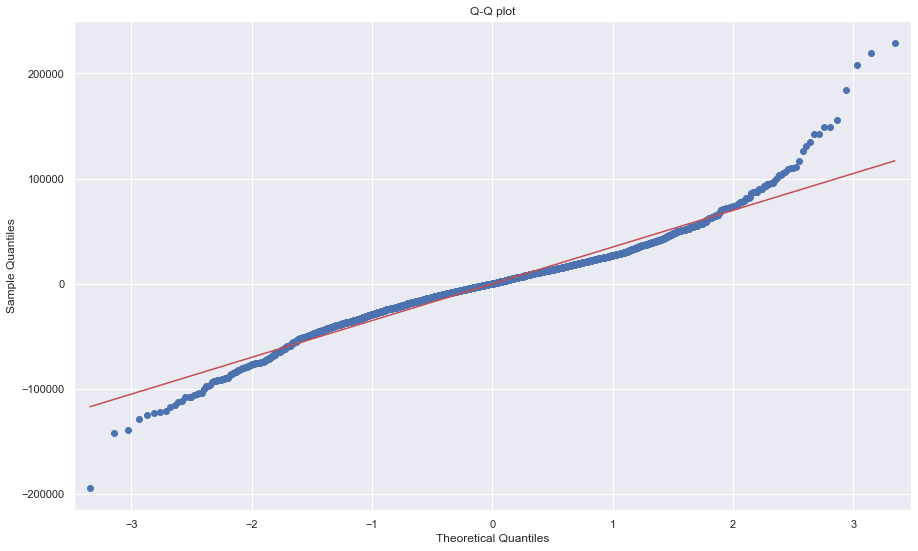

In [27]:
normality_of_residuals_test(lin_reg0)

## Log Transformation of Price & Assumption Checks ##

In [28]:
# Obtain and set x=input and y=output, take natural log of price 
x = GBGVWLO[["GBGVWLO"]]
y = np.log(numeric.SalePrice)

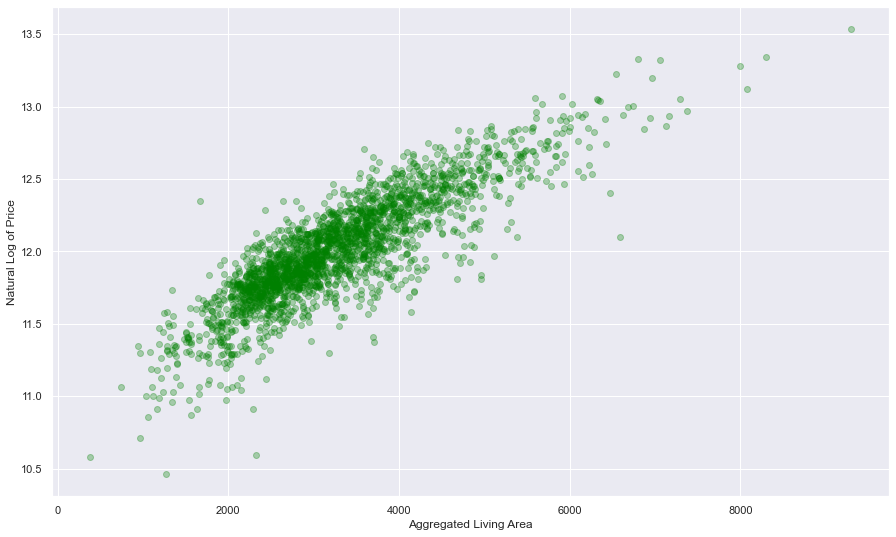

In [29]:
#Check Assumption 1: Linearity of relationship between input (x) and output (y) 
#using (A) scatterplot & (B) linearity tests

# Create (A) scatter plot between x and y
plt.scatter(x, y, c='green', alpha=0.3)
plt.xlabel('Aggregated Living Area')
plt.ylabel('Natural Log of Price')
plt.show()

In [30]:
#Setup statsmodels.api, inputs (x, x_constant, and y)
x_constant = sm.add_constant(x)

In [31]:
#Run OLS with statsmodels
lin_reg = sm.OLS(y,x_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     6970.
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:20:26   Log-Likelihood:                 609.62
No. Observations:                2414   AIC:                            -1215.
Df Residuals:                    2412   BIC:                            -1204.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9966      0.013    867.603      0.000      10.972      11.021
GBGVWLO        0.0003    3.7e-06     83.484      0.000       0.000       0.000
==============================================================================
Omnibus:                      283.964   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.509
Skew:                          -0.735   Prob(JB):                    7.91e-125
Kurtosis:                       4.876   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

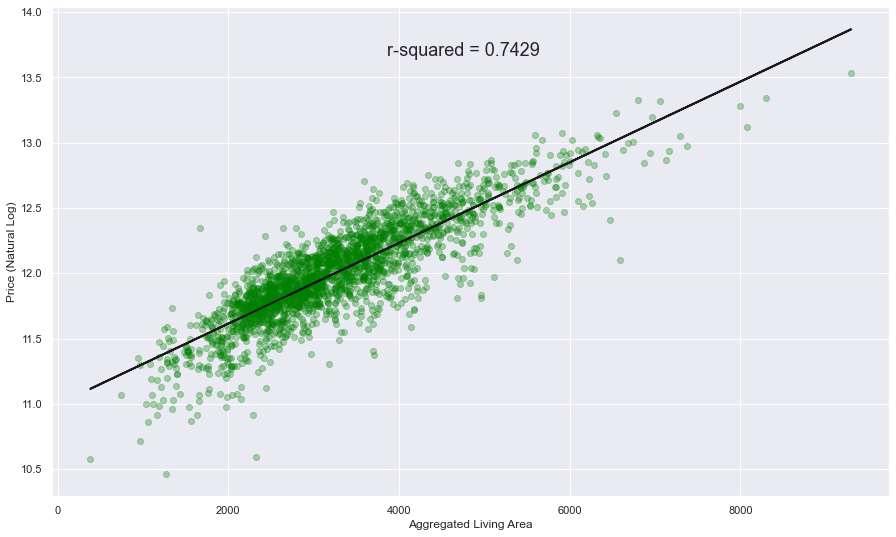

In [32]:
## Add fitted line to scatterplot
plt.plot(x, lin_reg.predict(), lw=2, c='k')

plt.scatter(x, y, c='green', alpha=0.3)
plt.xlabel('Aggregated Living Area')
plt.ylabel('Price (Natural Log)')
plt.annotate("r-squared = {:.4f}".format(lin_reg.rsquared), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=18)
plt.show()

In [33]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

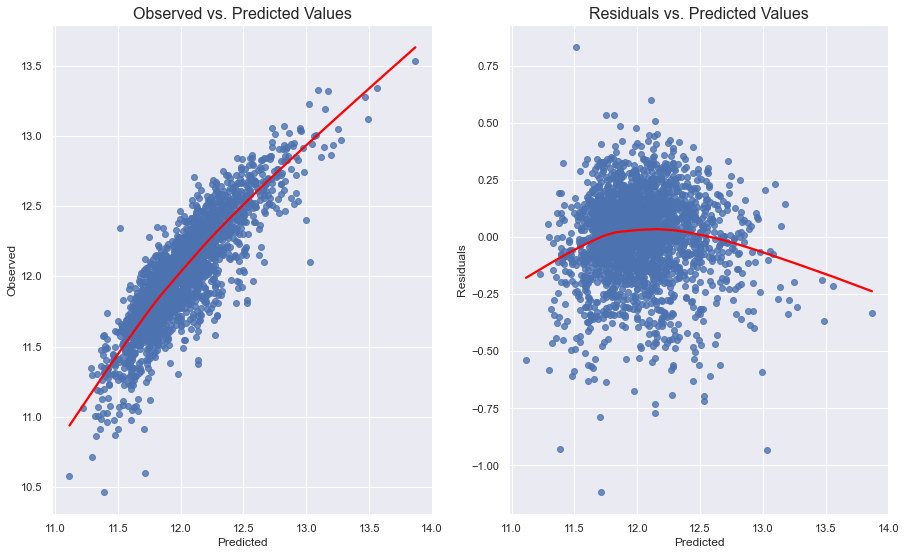

In [34]:
#Run (B) Linearity Test for Assumption #1

import seaborn as sns 
import matplotlib.pyplot as plt

#import statsmodels.stats.api as sms

sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

linearity_test(lin_reg, y)

In [35]:
#Check Assumption 2: Is expected (mean) value of residuals = 0? 
lin_reg.resid.mean()

-1.3572867399642758e-14

In [36]:
#Check Assumption 3: Are errors independent? 
import statsmodels
statsmodels.stats.stattools.durbin_watson(lin_reg.resid)

1.926209997139937

In [37]:
#Check Assumption 4: Normality of Residuals
from scipy import stats
import statsmodels.api as sm

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    


Jarque-Bera test ---- statistic: 571.5089, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9694, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.3508, p-value: 0.0000
Anderson-Darling test ---- statistic: 16.3467, 5% critical value: 0.7860
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


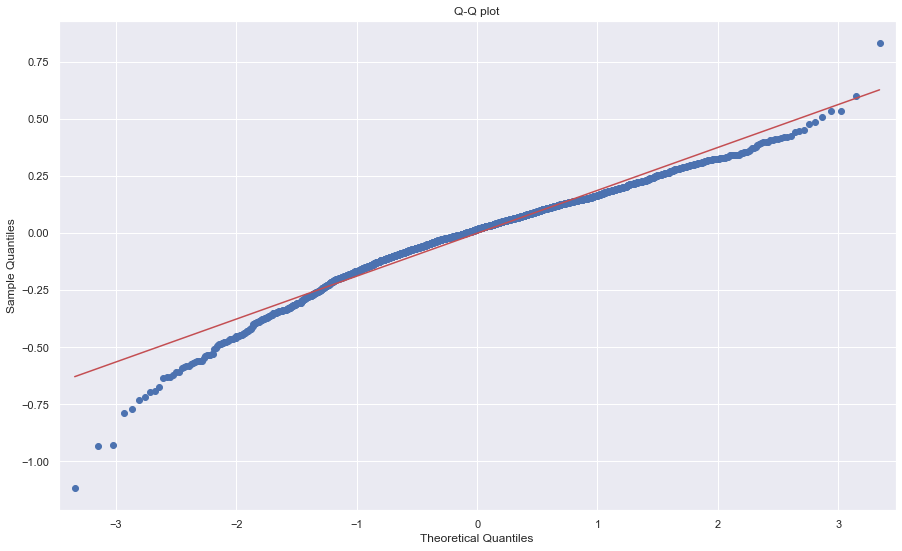

In [38]:
normality_of_residuals_test(lin_reg)

## Box-Cox Transformation of Price & Assumption Checks ##

In [39]:
# Obtain and set x=input and y=output, take box-cox transformation of price 
x = GBGVWLO[["GBGVWLO"]]
y, fitted_lambda = stats.boxcox(numeric.SalePrice)

In [40]:
fitted_lambda

-0.11080033041330277

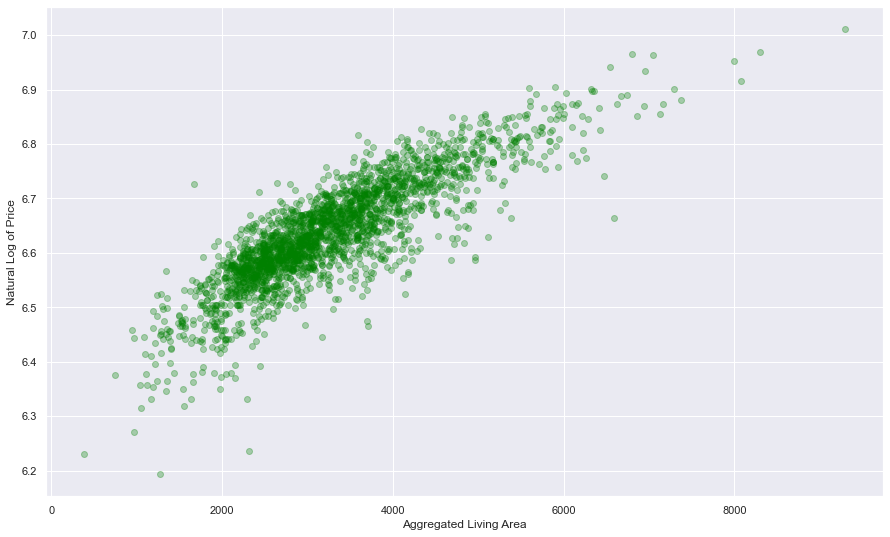

In [41]:
#Check Assumption 1: Linearity of relationship between input (x) and output (y) 
#using (A) scatterplot & (B) linearity tests

# Create (A) scatter plot between x and y
plt.scatter(x, y, c='green', alpha=0.3)
plt.xlabel('Aggregated Living Area')
plt.ylabel('Natural Log of Price')
plt.show()

In [42]:
#Setup statsmodels.api, inputs (x, x_constant, and y)
x_constant = sm.add_constant(x)

In [43]:
#Run OLS with statsmodels
lin_reg = sm.OLS(y,x_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     6620.
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:20:27   Log-Likelihood:                 3778.7
No. Observations:                2414   AIC:                            -7553.
Df Residuals:                    2412   BIC:                            -7542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3722      0.003   1868.491      0.000       6.366       6.379
GBGVWLO       8.1e-05   9.96e-07     81.362      0.000     7.9e-05    8.29e-05
==============================================================================
Omnibus:                      358.583   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              817.954
Skew:                          -0.854   Prob(JB):                    2.42e-178
Kurtosis:                       5.284   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

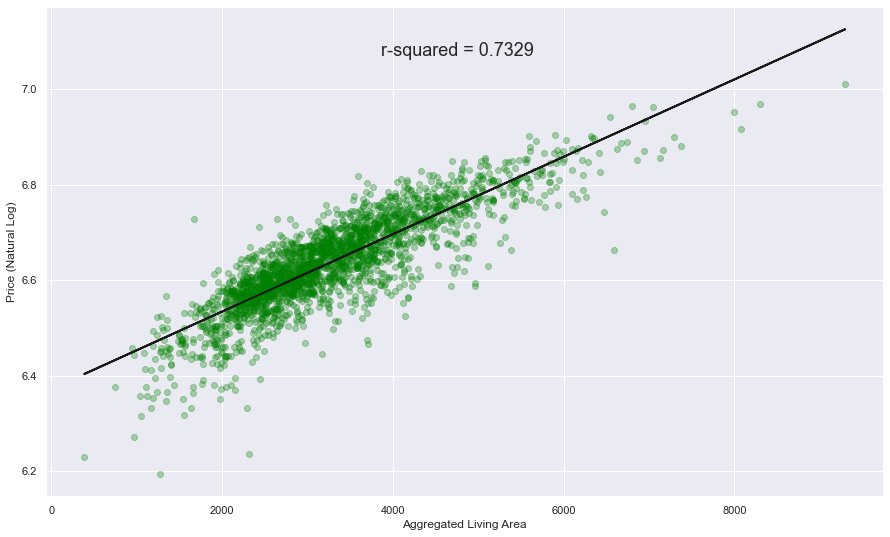

In [44]:
## Add fitted line to scatterplot
plt.plot(x, lin_reg.predict(), lw=2, c='k')

plt.scatter(x, y, c='green', alpha=0.3)
plt.xlabel('Aggregated Living Area')
plt.ylabel('Price (Natural Log)')
plt.annotate("r-squared = {:.4f}".format(lin_reg.rsquared), xy=(0.4,0.9),
                 xycoords = 'axes fraction', fontsize=18)
plt.show()

In [45]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

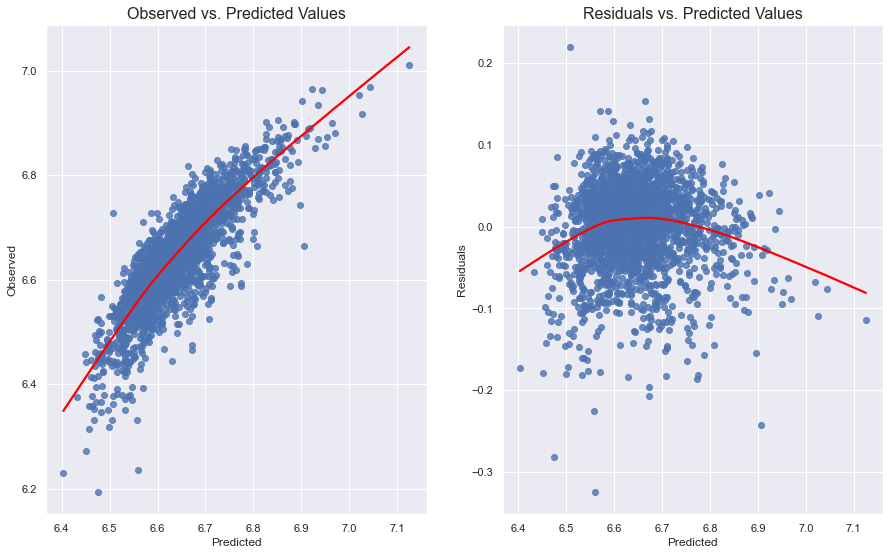

In [46]:
#Run (B) Linearity Test for Assumption #1

import seaborn as sns 
import matplotlib.pyplot as plt

#import statsmodels.stats.api as sms

sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

linearity_test(lin_reg, y)

In [47]:
#Check Assumption 2: Is expected (mean) value of residuals = 0? 
lin_reg.resid.mean()

-2.336343398962633e-16

In [48]:
#Check Assumption 3: Are errors independent? 
import statsmodels
statsmodels.stats.stattools.durbin_watson(lin_reg.resid)

1.93026894879494

In [49]:
#Check Assumption 4: Normality of Residuals
from scipy import stats
import statsmodels.api as sm

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    


Jarque-Bera test ---- statistic: 817.9542, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9620, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.4517, p-value: 0.0000
Anderson-Darling test ---- statistic: 19.7453, 5% critical value: 0.7860
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


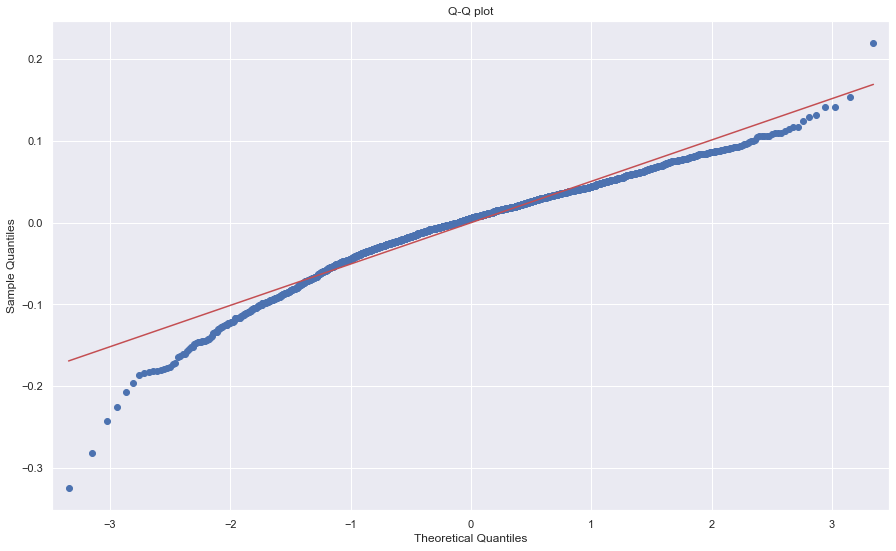

In [50]:
normality_of_residuals_test(lin_reg)